In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
train =pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

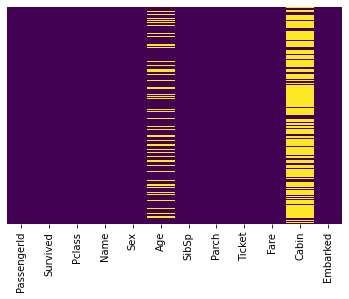

In [7]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

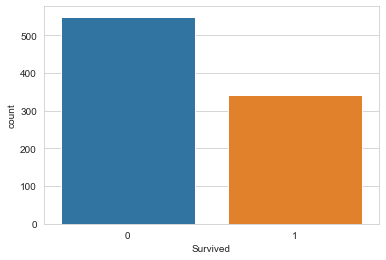

In [9]:
sns.countplot(x='Survived', data=train)

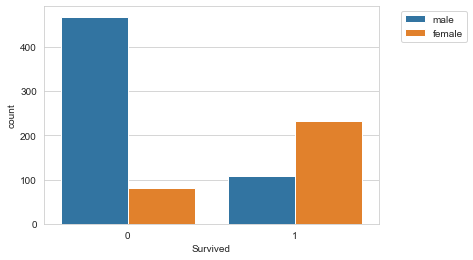

In [20]:
sns.countplot(x='Survived', data=train, hue='Sex')
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")

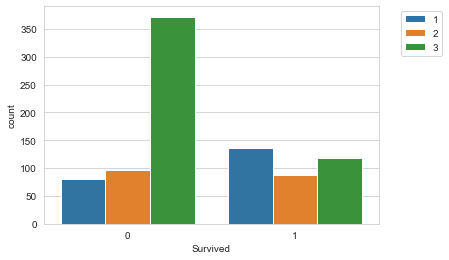

In [22]:
sns.countplot(x='Survived', data=train, hue='Pclass')
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")

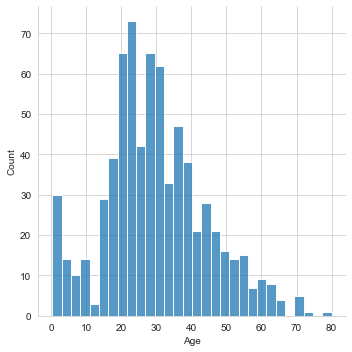

In [23]:
sns.displot(train['Age'].dropna(), bins=30)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

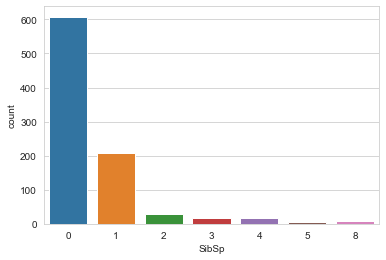

In [26]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

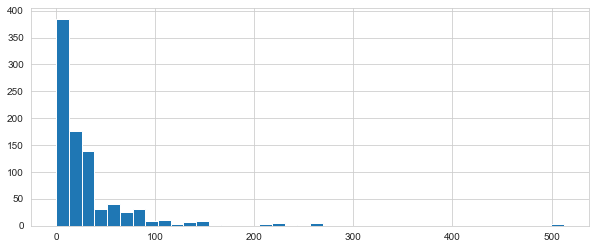

In [30]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [31]:
import cufflinks as cf


In [32]:
# cf.go_offline()

In [34]:
# train['Fare'].iplot(kind='hist', bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

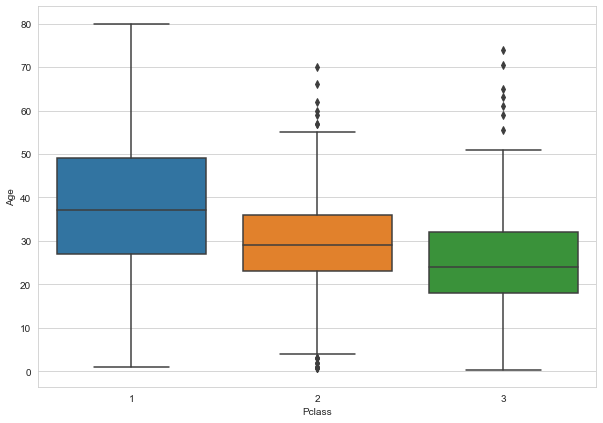

In [37]:
#data cleaning
#dealing with NaNs
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y ='Age', data=train)

In [45]:
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
            
        

In [46]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

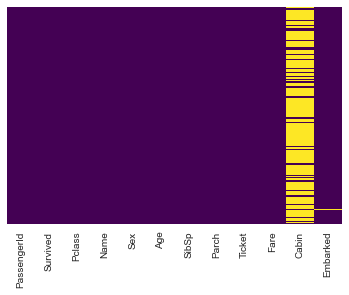

In [47]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [53]:
train.drop('Cabin', axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"

<AxesSubplot:>

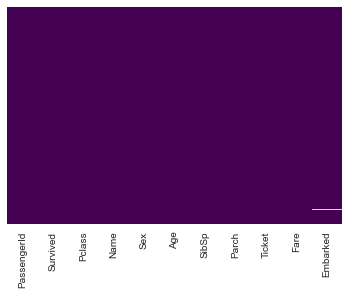

In [54]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [55]:
train.dropna(inplace=True)

<AxesSubplot:>

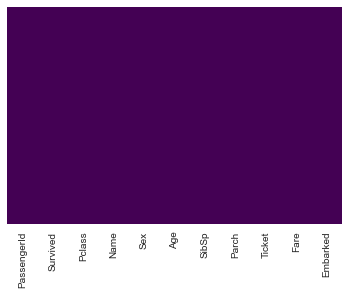

In [56]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [60]:
sex= pd.get_dummies(train['Sex'], drop_first=True)

In [61]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [64]:
train = pd.concat([train, sex,embark], axis=1)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S,1,0,1


In [66]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24.0,1,0,7.2500,1,0,1
1,2,1,1,37.0,1,0,71.2833,0,0,0
2,3,1,3,24.0,0,0,7.9250,0,0,1
3,4,1,1,37.0,1,0,53.1000,0,0,1
4,5,0,3,24.0,0,0,8.0500,1,0,1


In [68]:
train.drop('PassengerId', axis=1, inplace=True)

In [69]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24.0,1,0,7.2500,1,0,1
1,1,1,37.0,1,0,71.2833,0,0,0
2,1,3,24.0,0,0,7.9250,0,0,1
3,1,1,37.0,1,0,53.1000,0,0,1
4,0,3,24.0,0,0,8.0500,1,0,1


In [82]:
X = train.drop('Survived', axis=1)
y = train['Survived']



In [79]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [80]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel = LogisticRegression()

In [89]:
logmodel.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [90]:
predictions = logmodel.predict(X_test)

In [91]:
#evaluate model

from sklearn.metrics import classification_report


In [92]:
print(classification_report(y_test,  predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       163
           1       0.84      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
print(confusion_matrix(y_test,  predictions))

[[150  13]
 [ 36  68]]


In [95]:
#excercise